In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from os import listdir
from os.path import isfile, join

In [12]:
experiments = [x[0] for x in os.walk(".") if 'experiment' in x[0]]
experiments = ['./experiment_smallcrc10', './experiment_crc10', './experiment_smallcrc30', './']

In [13]:
def cdf(data, title):

    data_size=len(data)

    # Set bins edges
    data_set=sorted(set(data))
    bins=np.append(data_set, data_set[-1]+1)

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data, bins=bins, density=False)

    counts=counts.astype(float)/data_size

    # Find the cdf
    cdf = np.cumsum(counts)

    # Plot the cdf
    plt.plot(bin_edges[0:-1], cdf)
    plt.ylim((0,1))
    plt.xlabel("Seconds")
    plt.ylabel("CDF")
    plt.title(title)
    plt.grid(True)

    plt.show()

./experiment_smallcrc10
172.31.29.59:3000_1592035323.9116182.json
0.00801093325506235


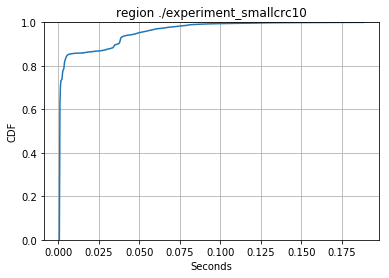

./experiment_crc10
172.31.24.34_3000_1592029343.1692717.json
0.013478004152403297


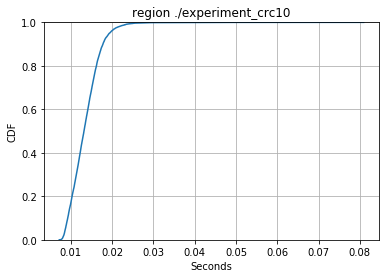

./experiment_smallcrc30
172.31.28.175:3000_1592035781.7933848.json
0.038004306755132874


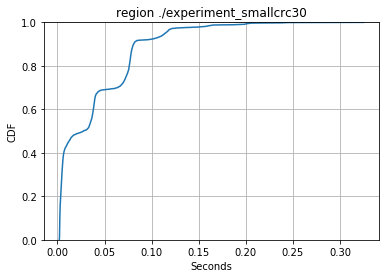

./experiment_crc30
172.31.18.47_3000_1592029690.3737488.json
0.07161090717989028


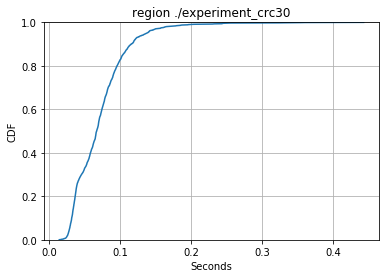

In [14]:
for experiment in experiments:
    log_files = [f for f in listdir(experiment) if isfile(join(experiment, f))]
    for log_file in log_files:
        print(experiment)
        print(log_file)
        file_path = experiment+"/"+log_file
        data = json.load(open(file_path, "rb"))
        region_data = data['region']
        move_data = data['move']
        
        print(np.average(region_data))
        
        cdf(region_data, "region "+experiment)
        #cdf(move_data, "move")
        break
        
        
    
    